In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
c = pd.read_csv('color.csv')['color'].values

### Sensitivity: Budget Importance

In [3]:
def superscript_text(text):
    superscript_map = {
        '0': '⁰', '1': '¹', '2': '²', '3': '³', '4': '⁴',
        '5': '⁵', '6': '⁶', '7': '⁷', '8': '⁸', '9': '⁹',
        'a': 'ᵃ', 'b': 'ᵇ', 'c': 'ᶜ', 'd': 'ᵈ', 'e': 'ᵉ',
        'f': 'ᶠ', 'g': 'ᵍ', 'h': 'ʰ', 'i': 'ⁱ', 'j': 'ʲ',
        'k': 'ᵏ', 'l': 'ˡ', 'm': 'ᵐ', 'n': 'ⁿ', 'o': 'ᵒ',
        'p': 'ᵖ', 'q': 'ᵠ', 'r': 'ʳ', 's': 'ˢ', 't': 'ᵗ',
        'u': 'ᵘ', 'v': 'ᵛ', 'w': 'ʷ', 'x': 'ˣ', 'y': 'ʸ',
        'z': 'ᶻ', '+': '⁺', '-': '⁻', '=': '⁼', '(': '⁽',
        ')': '⁾', '/': '⁄', ' ': ' ', 'R': ''
    }
    return ''.join(superscript_map.get(char, char) for char in text.lower())

In [36]:
def make_radar_chart(stats, params):
    gamma_symbol = '\u03B3'
    fig = plt.figure(figsize=(15, 4), dpi=300)
    labels = [f'RM{superscript_text("rob")}', f'RM{superscript_text("Red")}', f'RM{superscript_text("Res")}']
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False) # generate angles
    angles = [(a + np.deg2rad(30)) % (2 * np.pi) for a in angles]
    angle = np.concatenate((angles,[angles[0]]))
    label =np.concatenate((labels,[labels[0]]))
    for i in range(4):
        ax = fig.add_subplot(int(f'14{i+1}'), polar=True)
        stat = np.concatenate((stats[i],[stats[i][0]]))
        ax.plot(angle, stat, 'o-', linewidth=2, color=c[1], alpha=0.5)
        ax.fill(angle, stat, color=c[1], alpha=0.4)
        ax.set_thetagrids(angle * 180/np.pi, label)
        plt.ylim([0, 1])
        ax.set_title(f'{gamma_symbol}{superscript_text("Budget")}: {params[i]}')
        ax.grid(True)


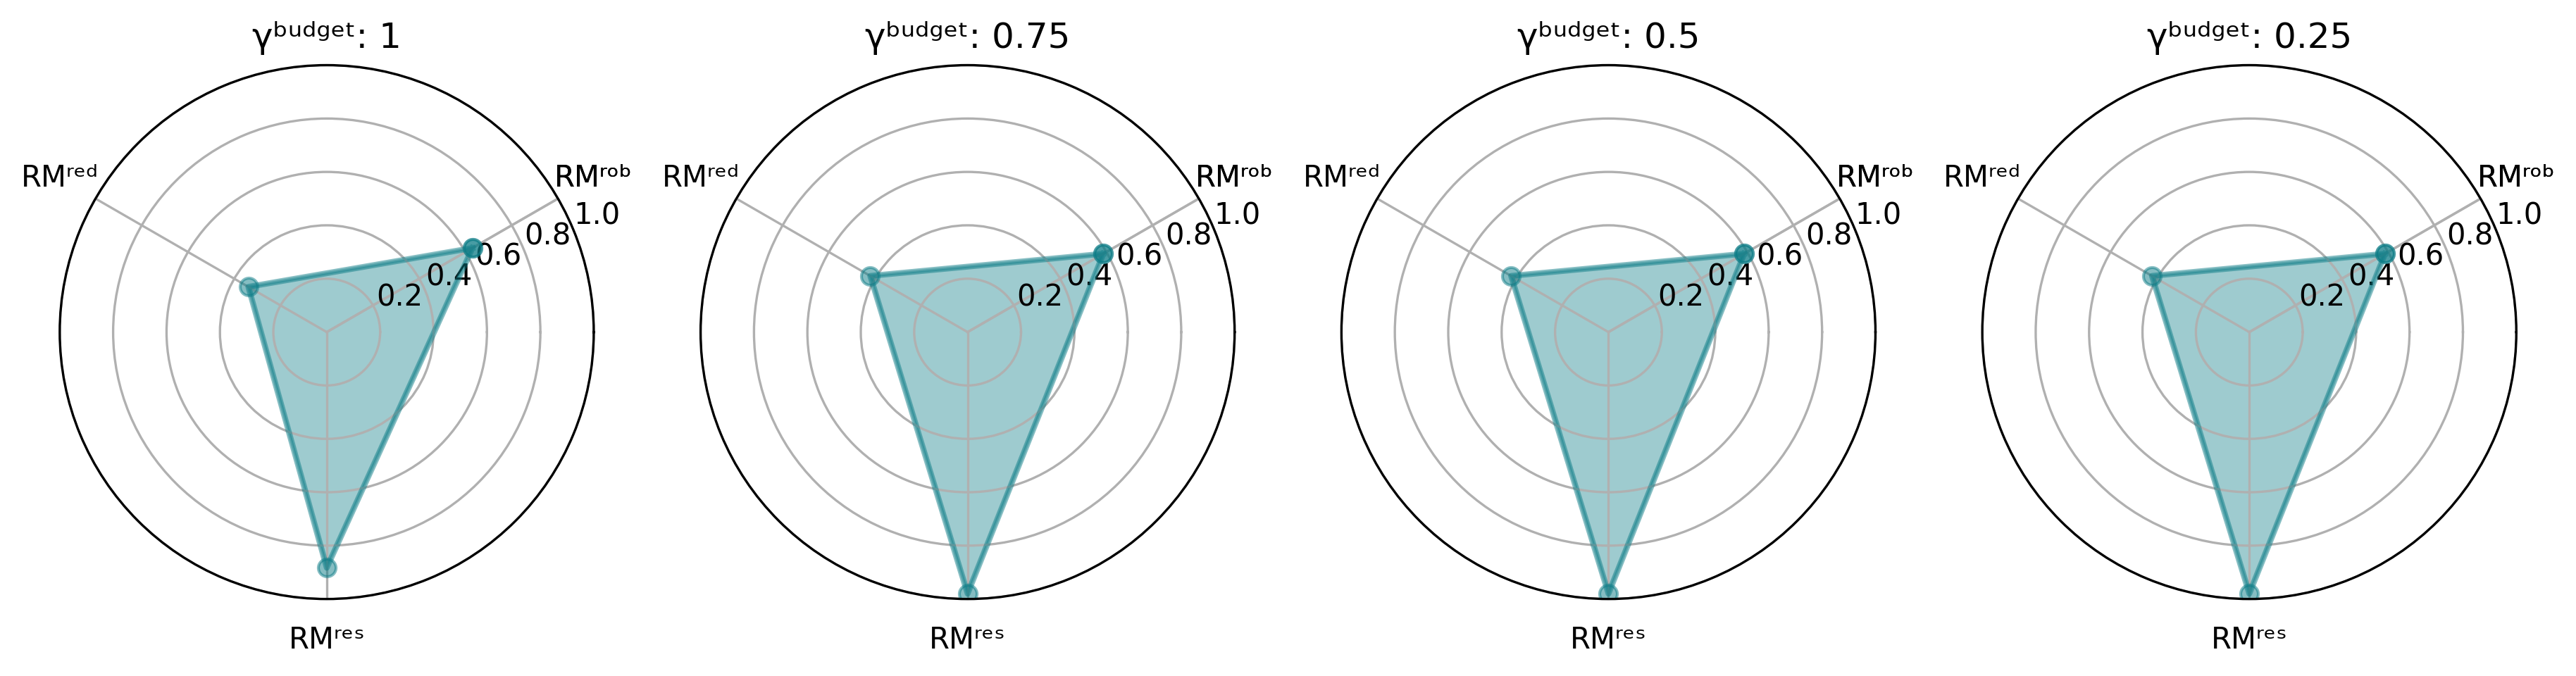

In [37]:
make_radar_chart(stats=[[0.630,	0.339, 0.883],
                        [0.587,	0.421,	0.980],
                        [0.587,	0.421,	0.980],
                        [0.587,	0.421,	0.980]],
                 params=[1, 0.75, 0.5, 0.25])
plt.savefig('../IMG/Sensitivity-Budget.jpg', bbox_inches='tight')